# Bayesian Learning

This lab introduces you to a Bayesian/probabilistic perspective of Machine Learning. In order to have full information about the underlying distributions, we will be using *synthetic datasets*, i.e. datasets that we sample from distributions that we define explicitly ourselves.

These data sets will be used to perform a Bayesian linear regression. We are looking at the MAP estimate and the posterior distribution of the model parameters. In order to keep it simple, we restrict ourselves to one-dimensional input spaces.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Synthetic dataset for linear regression

We model the conditional distribution $p(y \mid x)$ given the marginal distribution $p(x)$ on $\mathbb{R}$ and a function $f: \mathbb{R} \rightarrow \mathbb{R}$  as follows:

$$ p(y \mid x) = f(x) + \epsilon \qquad \left(\epsilon \sim \mathcal{N}(0, \sigma^2)\right), $$

where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ means that $\epsilon$ is a random variable normally distributed with zero mean and a variance of $\sigma^2$. Note that $f$ actually only has to be defined for $x$ with nonzero probability (this set of $x$ is called the *support of $p$*). Thus, we have fully specified the joint distribution $p(x, y) = p(x) p(y \mid x)$.

The function $f$ controls the relationship between $x$ and $y$. For example, if we use a linear function for $f$, there will be a linear relationship between $x$ and $y$ (plus some noise); hence, in this case, a linear regression model will be adequate to predict $y$ from $x$. 

To generate a data set $D = \{(x_i, y_i) \in X \times Y \mid 1 \leq i \leq N\}$ we sample tuples $(x, y)$ by first picking an $x$ from the distribution $p(x)$. To compute the $y$, we sample a noise-term $\epsilon$ from the normal distribution with the specified mean and variance, and compute $y = f(x) + \epsilon$. The output $(x, y)$ is then one sample of our data set. Since we sample independently and identically distributed (*i.i.d*) we do this process $N$ times to obtain $D$.

As ground work we first learn about the <a href="http://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a> package, which contains distributions to sample from or computing quantities such as the *probability density function* (*pdf*), and about Python generators.


조건부 분포 $p(y \mid x)$를 주변 분포 $p(x)$와 함수 $f: \mathbb{R} \rightarrow \mathbb{R}$로 다음과 같이 모델링합니다:

$$ p(y \mid x) = f(x) + \epsilon \qquad \left(\epsilon \sim \mathcal{N}(0, \sigma^2)\right), $$

여기서 $\epsilon \sim \mathcal{N}(0, \sigma^2)$는 $\epsilon$이 평균이 0이고 분산이 $\sigma^2$인 정규 분포를 따르는 랜덤 변수임을 의미합니다. $f$는 실제로 $x$의 확률이 0이 아닌 부분에서만 정의되면 됩니다 (이 $x$의 집합을 $p$의 지지 집합이라고 합니다). 따라서, 우리는 $p(x, y) = p(x) p(y \mid x)$라는 결합 분포를 완전히 명시했습니다.

함수 $f$는 $x$와 $y$ 간의 관계를 제어합니다. 예를 들어, $f$에 선형 함수를 사용하면 $x$와 $y$ 사이에 (일부 노이즈가 포함된) 선형 관계가 형성됩니다. 따라서 이 경우, 선형 회귀 모델은 $x$로부터 $y$를 예측하는 데 적합할 것입니다.

데이터셋 $D = {(x_i, y_i) \in X \times Y \mid 1 \leq i \leq N}$을 생성하기 위해 우리는 먼저 분포 $p(x)$에서 $x$를 선택하여 튜플 $(x, y)$를 샘플링합니다. $y$를 계산하기 위해 정해진 평균과 분산을 가진 정규 분포에서 노이즈 항 $\epsilon$을 샘플링하고, $y = f(x) + \epsilon$을 계산합니다. 출력 $(x, y)$는 데이터셋의 하나의 샘플이 됩니다. 우리는 독립적이고 동일하게 분포된 (i.i.d) 방식으로 이 과정을 $N$번 반복하여 $D$를 얻습니다.

기초 작업으로 우리는 <a href="http://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a> 패키지에 대해 학습합니다. 이 패키지는 샘플링할 분포나 확률 밀도 함수 (pdf) 등의 양을 계산하는 도구를 포함하고 있으며, Python 생성자에 대해서도 학습합니다.







First import the uniform and normal distributions.

In [23]:
from scipy.stats import uniform
from scipy.stats import norm

# scipy.stats는 다양한 확률 분포를 제공합니다. 예를 들어, 정규 분포, 이항 분포, 포아송 분포 등. 각 분포는 PDF (확률 밀도 함수), CDF (누적 분포 함수), PPF (퍼센타일 포인트 함수), SF (서바이벌 함수) 등의 메서드를 포함합니다.
# scipy.stats는 다양한 통계량을 계산하는 함수들을 제공합니다. 예를 들어, 평균, 분산, 표준편차, 피어슨 상관 계수, 스피어맨 상관 계수 등.
# 가설 검정을 수행하는 다양한 함수를 제공합니다. 예를 들어, t-검정, 카이제곱 검정, 윌콕슨 검정 등.

# 샘플링: rvs()
#확률 밀도 함수: pdf()
#누적 분포 함수: cdf()
#퍼센타일 포인트 함수: ppf()
#평균: mean()
#분산: var()
#표준편차: std()
#피어슨 상관 계수: pearsonr()
#t-검정: ttest_ind()


In [24]:
# Models uniform distribution on the interval [loc, loc+scale]
b = uniform(loc=0, scale=4) # 하한값을 0, 상한값을 4로 하는 uniform distribution을 생성합니다.
print(b)

In [25]:
print ("10 samples: {}".format(b.rvs(10))) # 분포에서 10개 샘플링하고, 
print ("Probablity density at x = 0: {}".format(b.pdf(0))) # 확률 밀도 함수를 계산합니다.

10 samples: [0.77677054 1.58464665 1.85905854 2.72126556 1.81363242 1.40784691
 1.91399196 1.86116711 2.26858533 1.94793786]
Probablity density at x = 0: 0.25


In the following code snippet we are sampling from a standard normal distribution and look at the distribution of the samples.

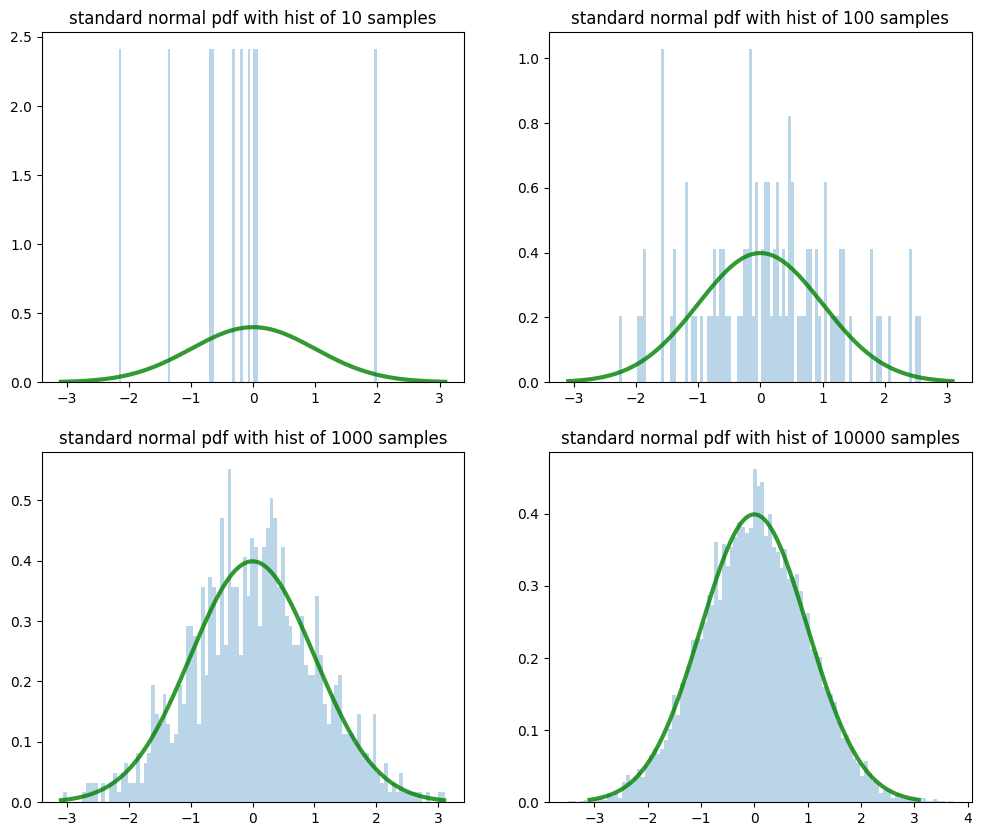

In [26]:
a = norm(loc=0, scale=1)

# this creates a grid of 2x2 plots; 2x2 격자플롯 생성
# axes is then a 2x2 np.ndarray
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# sample 1000 points from the 0.01 percentile to 0.99 percentile
# 0.01 백분위수에서 0.99 백분위수까지 1000개의 점을 샘플링
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 1000) 

num_samples = [10, 100, 1000, 10000]
# we go through the axes one by one, need to make the 2x2 matrix linear before
# axes를 하나씩 순회, 2x2 배열을 일차원으로 변환, 차례대로 하나씩 넣기 위해서 
for i, ax in enumerate(axes.reshape(4)):
    # 표준 정규 분포 객체 생성 (평균 0, 표준편차 1)
    normal_dist = norm(loc=0, scale=1)
    # PDF(확률 밀도 함수) 그리기
    ax.plot(x, normal_dist.pdf(x), 'g', lw=3, alpha=.8)
    # num_samples[i] 크기의 샘플 생성
    ys = normal_dist.rvs(size=num_samples[i])
    # 히스토그램 그리기
    ax.hist(ys, density=True, bins=100, histtype="stepfilled", alpha=0.3)
    ax.set_title('standard normal pdf with hist of {} samples'.format(num_samples[i]))

Generators are a special kind of functions in Python. Instead of returning only a single value, they behave like an iterator, i.e.,  return a (possibly infinite) sequence of values. Syntactically, the only difference between a 'normal' function and a generator is that  a generator uses the <b>yield</b> keyword rather than <b>return</b>. Once <b>yield</b> is used in the definition of a function,  the <b>next()</b> method is generated automatically. Each time, the generator's <b>next()</b> method is called, the generator function is executed until the <b>yield</b> keyword is reached. Similar to <b>return</b>, it returns the value given as parameter. If the generator is told to generate more values (using <b>next()</b>), the execution continues from the point of the last call of <b>yield</b>. Typically, <b>yield</b> is inside a (usually infinite) loop.  As an example, we write a generator that generates the natural numbers $\mathbb{N}_0$, i.e. $0, 1, 2, \dots$.

제네레이터는 단일값을 반환하는 대신 반복자처럼 동작하여 값의 시퀀스를 반환한다. `return` 대신 `yield`를 사용한다. `yield`를 사용하면 제네레이터 객체가 반환된다. 이 객체는 자동으로 `next()`메서드를 가진다. 얘가 호출될 때 마다 제네레이터가 실행된다. 제너레이터가 추가 값을 생성하도록 요청받으면(`next()` 메서드를 사용하여), 실행은 마지막 yield 호출 시점부터 계속된다. 보통 `yield`는 무한루프 안에 위치한다. 

In [27]:
def natural_numbers():
    i = 0
    
    while True: # infinite loop!
        yield i
        i += 1

In [28]:
gen = natural_numbers()
print (type(gen))
print (next(gen))
print ([next(gen) for i in range(100)]) # take 100 numbers, note that 0 was already generated!

<class 'generator'>
0
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


<b>Exercise 1</b>: Complete the code of the following three generators:

- uniform_gen(a,b): generates a randomly sampled element from a uniform distribution with boundaries a and b. Assert that a < b.

- normal_gen(mean, std): generates a randomly sampled element from a normal distribution with mean=mean and variance=std². Assert that std >= 0.

- data_gen(f, x_gen, noise_gen): Generates data points (x, y), where x is assumed to be sampled using a generator function x_gen and y is f(x) + eps, where eps is assumed to be sampled using a generator function noise_gen (see introduction above). 

    You don't need to implement the two generator functions for x and eps here. 

In [29]:
def uniform_generator(a, b):
    
    unidist = uniform(loc = a, scale = b-a)
    assert a<b # a must be less than b
    
    while True: # infinite loop!
        yield unidist.rvs()
        
def normal_generator(mean, std):
    
    assert std >= 0 # standard deviation must be non-negative
    normdist = norm(loc=mean, scale=std)
    while True: 
        # dont need to create a new object every time
        yield normdist.rvs()
    
        
def data_generator(f, x_gen, noise_gen):
    
    while True: 
        x = next(x_gen)
        eps = next(noise_gen)
        y = f(x) + eps
        yield (x,y)


In [30]:
import itertools
from scipy.stats import normaltest
    
try: 
    num_gen = uniform_generator(1, 5)
    numbers = [next(num_gen) for _ in range(1000)]
    
    assert all(1 <= num and num <= 5 for num in numbers), "The uniform generator"
    
    normal_gen = normal_generator(0, 1)
    numbers_normal = [next(normal_gen) for _ in range(1000)]
    
    k2, p = normaltest(numbers_normal)
    
    assert p > 1e-3, "The normal generator"
   
    def constant_generator(c):
        while True:
            yield c

    data_gen = data_generator(lambda x: x**2, uniform_generator(-1, 1), constant_generator(0))
    
    assert all([x**2 == y for x, y in itertools.islice(data_gen, 0, 1000)]), "The data generator"
    
    print ("The code seems fine.")
    
except AssertionError as err:
    print ("Currently there is a fault in: " + str(err))

The code seems fine.


## 2. Posterior Distribution of $\theta$ and MAP

We now perform a Bayesian linear regression on data that is generated as explained in the introduction above. x is sampled from a uniform distribution with lower bound 0 and upper bound 5. The label y of an instance x is generated via $f(x) = 5x + 3$ plus some normally distributed  noise eps that has a standard deviation of $2.5$.

In [31]:
sigma   = 2.5 # sigma of the noise, do not change this!

data_gen = data_generator(lambda x: 5*x + 3, uniform_generator(0, 5), normal_generator(0, sigma))
data = list(itertools.islice(data_gen, 0, 100)) # list of pairs (x, y)
x, y = zip(*data) # The asterisk unpacks data; i.e., this line corresponds to x,y=zip((x[0], y[0]), ((x[1], y[1])), ...)                         

Text(0.5, 1.0, 'Sampled data set')

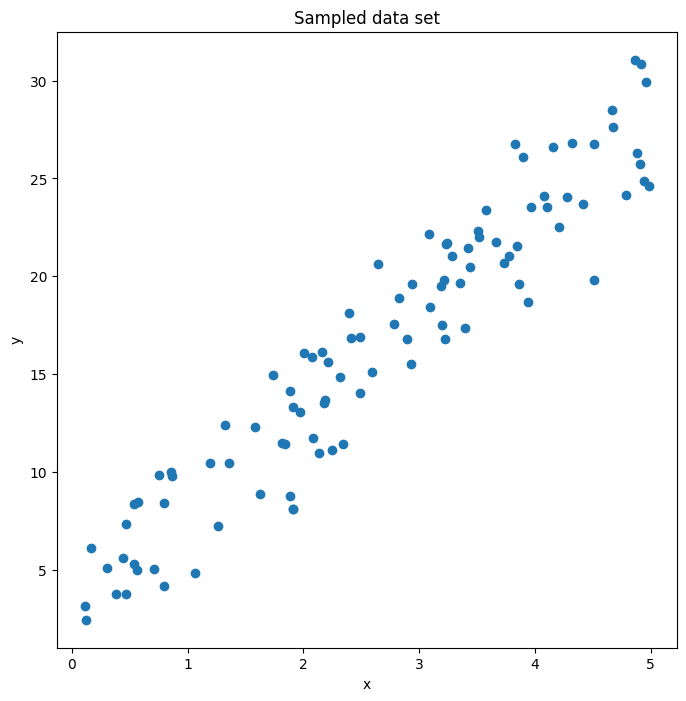

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Sampled data set")

We also add a bias. More precisely we extend the vector $x$ to a matrix by writing it as a column and adding a vector of $1$ next to it.

편향(bias)을 추가하기 위해, 벡터 x를 열로 작성하고, 그 옆에 1의 벡터를 추가하여 행렬로 확장합니다.

In [33]:
N = len(x)
X = np.column_stack((np.asarray(x), np.ones(N)))
print(X)

[[4.50820905 1.        ]
 [4.86462376 1.        ]
 [4.94365135 1.        ]
 [1.81214254 1.        ]
 [2.18799184 1.        ]
 [2.93526279 1.        ]
 [3.77494512 1.        ]
 [4.91669507 1.        ]
 [2.16563346 1.        ]
 [1.88705065 1.        ]
 [4.0767659  1.        ]
 [3.44140641 1.        ]
 [0.79726703 1.        ]
 [0.56231809 1.        ]
 [1.3211672  1.        ]
 [1.96923385 1.        ]
 [3.66748559 1.        ]
 [3.86140206 1.        ]
 [3.84762594 1.        ]
 [2.82283467 1.        ]
 [2.9304007  1.        ]
 [3.19233795 1.        ]
 [1.91229126 1.        ]
 [1.26508013 1.        ]
 [2.24442625 1.        ]
 [1.62401986 1.        ]
 [4.78470184 1.        ]
 [3.82693779 1.        ]
 [0.57181581 1.        ]
 [2.78757605 1.        ]
 [1.35743287 1.        ]
 [4.66765886 1.        ]
 [0.86348975 1.        ]
 [0.47060229 1.        ]
 [1.91110848 1.        ]
 [4.27420234 1.        ]
 [0.54053617 1.        ]
 [2.64944788 1.        ]
 [4.98432118 1.        ]
 [3.08623975 1.        ]


<b>Exercise 2</b>: Let $X$ be a data matrix with dimensions $N \times D$,  $y$ a label vector of dimension $D$. Moreover, let $\sigma$ be a noise parameter  (standard deviation of the output noise) and $\sigma_p$ the standard deviation for the prior distribution of the weights $\theta$. Implement the missing parts of the following functions:

- get_MAP: Returns the MAP estimate $\theta_{\text{MAP}}$ given $X, y, \sigma, \sigma_p$.

$$ \theta_{\text{MAP}} = \left(X^T X + \frac{\sigma^2}{\sigma_p^2} I\right)^{-1} X^T y. $$

- get_posterior_distribution_parameters: Returns the mean vector (equal to the MAP estimate) and the covariance matrix $\Sigma$ for the posterior distribution of $\theta$ given $X$ and $y$.

$$ \Sigma = \frac{1}{\sigma^2} X^T X + \frac{1}{\sigma_p^2} I. $$

In [34]:
def get_MAP(X, y, sigma, sigma_p):
    
    theta_MAP = np.dot(np.linalg.inv((np.dot(X.T, X) + sigma**2/sigma_p**2 * np.eye(X.shape[1]))), np.dot(X.T, y))
    return theta_MAP

def get_posterior_distribution_parameters(X, y, sigma, sigma_p):
    
    covariance_matrix = 1/sigma**2 * X.T @ X + 1/sigma_p**2 * np.eye(X.shape[1])
    #theta_MAP = np.mean(covariance_matrix)
    theta_MAP = get_MAP(X, y, sigma, sigma_p)
    return theta_MAP, covariance_matrix

In [35]:
sigma_p = 5

theta_MAP = get_MAP(X, y, sigma=sigma, sigma_p=sigma_p)
theta_MAPP,cov = get_posterior_distribution_parameters(X, y, sigma=sigma, sigma_p=sigma_p)
print("theta (MAP estimate): {}".format(theta_MAP))
print("theta (MAP estimate): {},{}".format(theta_MAPP,cov))

theta (MAP estimate): [4.95375136 3.32223999]
theta (MAP estimate): [4.95375136 3.32223999],[[142.75818527  42.20337683]
 [ 42.20337683  16.04      ]]


To use multivariate normal distributions, a different distribution has to be imported from scipy.stats. We visualize the posterior distribution of the weights.

[[4.59826366 4.50804382]
 [4.90356414 3.76511052]
 [5.02131855 3.58500526]
 [4.91438839 3.40853783]
 [4.71759811 3.51639925]]


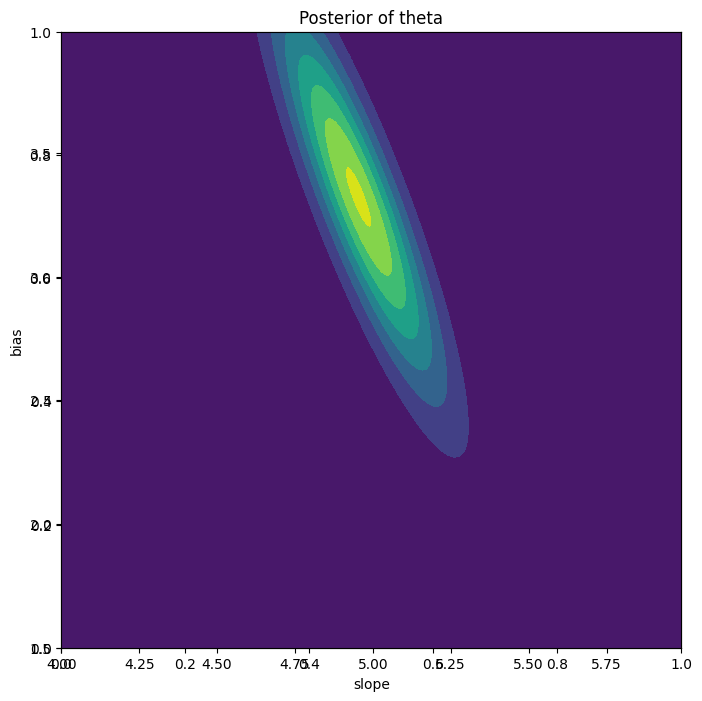

In [38]:
#import warnings
#from matplotlib.cbook import mplDeprecation
from scipy.stats import multivariate_normal

theta_MAP, Sigma = get_posterior_distribution_parameters(X, y, sigma, sigma_p)

mvn = multivariate_normal(theta_MAP,np.linalg.inv(Sigma))
thetas = mvn.rvs(5)

def generate_contour(mvn, ax):
    a, b = np.mgrid[4:6:.01, 1.5:4:.01]
    pos = np.dstack((a, b))
    ax = fig.add_subplot(111)
    ax.contourf(a, b, mvn.pdf(pos))
    
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("Posterior of theta")
ax.set_xlabel("slope")
ax.set_ylabel("bias")
generate_contour(mvn, ax)
print(thetas)

We visualize the MAP estimate and sample posterior curves.

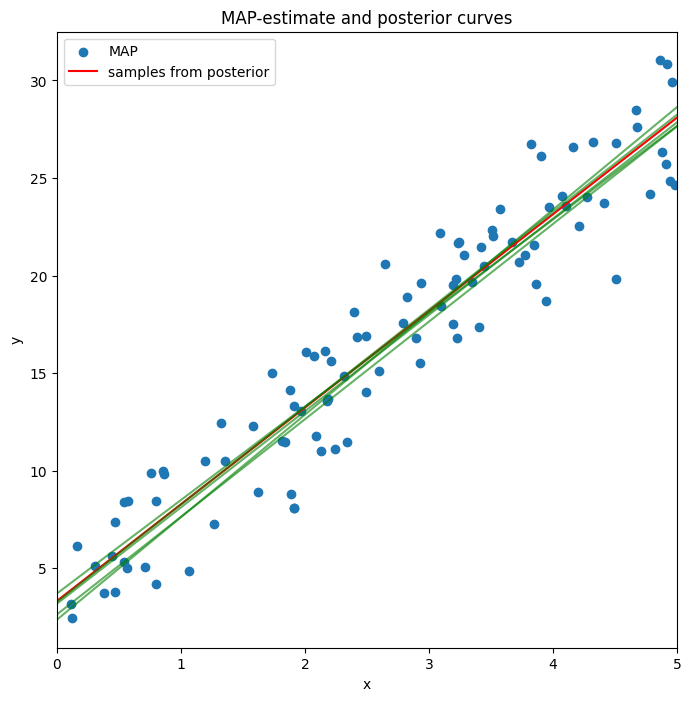

In [37]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("MAP-estimate and posterior curves")

ps = np.linspace(0, 5, 1000)

def predict(theta):
    return lambda x: theta[0] * x + theta[1]

plt.plot(ps, list(map(predict(theta_MAP), ps)), "r-", label="MAP")

for theta in thetas:
    plt.plot(ps, list(map(predict(theta), ps)), "g-", alpha=0.6)
plt.legend(["MAP", "samples from posterior"], loc="best")
plt.xlim([0, 5])
plt.show()

